# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique (K-Means)

### Import Required packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [ ]:
data = pd.read_csv('Online_Retail_Train.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [ ]:
data.shape

(514813, 8)

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
# original dataframe for backup
data_orig = data

In [ ]:
# Identify the cancelled orders
len(data[data.InvoiceNo.str[0] == 'C']), len(data[data.Quantity < 1 ])

(8797, 10084)

In [ ]:
# Check the null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64

In [ ]:
# Irrelevant transactions
Irrelevant = data['StockCode'].astype('str').unique()
Irrelevant.sort()
print('Irrelevant Transactions: \n',Irrelevant[::-1][:100])

Irrelevant Transactions: 
 ['m' 'gift_0001_50' 'gift_0001_40' 'gift_0001_30' 'gift_0001_20'
 'gift_0001_10' 'S' 'POST' 'PADS' 'M' 'DOT' 'DCGSSGIRL' 'DCGSSBOY'
 'DCGS0076' 'DCGS0074' 'DCGS0073' 'DCGS0072' 'DCGS0071' 'DCGS0070'
 'DCGS0069' 'DCGS0068' 'DCGS0066P' 'DCGS0057' 'DCGS0004' 'DCGS0003' 'D'
 'CRUK' 'C2' 'BANK CHARGES' 'B' 'AMAZONFEE' '90214Z' '90214Y' '90214W'
 '90214V' '90214U' '90214T' '90214S' '90214R' '90214P' '90214O' '90214N'
 '90214M' '90214L' '90214K' '90214J' '90214I' '90214H' '90214G' '90214F'
 '90214E' '90214D' '90214C' '90214B' '90214A' '90212C' '90212B' '90211B'
 '90211A' '90210D' '90210C' '90210B' '90210A' '90209C' '90209B' '90209A'
 '90208' '90206C' '90206A' '90205C' '90205A' '90204' '90202D' '90202C'
 '90202B' '90202A' '90201D' '90201C' '90201B' '90201A' '90200E' '90200D'
 '90200C' '90200B' '90200A' '90199D' '90199C' '90199B' '90199A' '90198B'
 '90198A' '90197B' '90196B' '90196A' '90195B' '90195A' '90194' '90192'
 '90191' '90190C']


In [ ]:
def pre_processing(df):
    df.drop_duplicates(inplace=True)
    df = df[~ (df.InvoiceNo.str[0] == 'C')]
    df.dropna(inplace=True)
    df = df[~(df['StockCode'].isin(['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']))]
    df = df[(np.abs(scipy.stats.zscore(df['UnitPrice']))<3) & (np.abs(scipy.stats.zscore(df['Quantity']))<5)]
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].values)
    df['DayOfWeek'] = [i.dayofweek for i in df['InvoiceDate']]
    df['MonthName'] = [i.month_name() for i in df['InvoiceDate']]
    return df

data  = pre_processing(data_orig)

## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

#### 1. Are there any free items in the data ? How many are there ?

In [ ]:
data[data.UnitPrice == 0].count()

InvoiceNo      30
StockCode      30
Description    30
Quantity       30
InvoiceDate    30
UnitPrice      30
CustomerID     30
Country        30
DayOfWeek      30
MonthName      30
dtype: int64

#### 2. Find the number of transactions per country and visualize

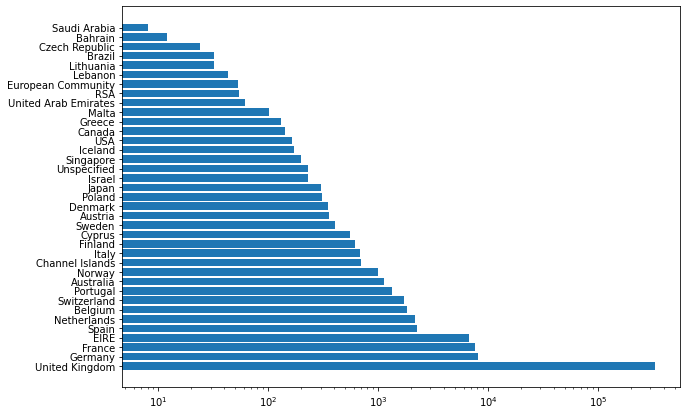

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(data.Country.value_counts().index, data.Country.value_counts(), log=True)
plt.show()

#### 3. What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot

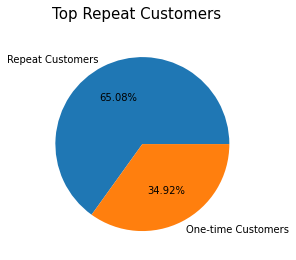

In [ ]:
MostRepeat = data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
rep = MostRepeat[MostRepeat != 1].values
nrep = MostRepeat[MostRepeat == 1].values
ser = pd.Series([len(rep)/ len(MostRepeat),len(nrep)/len(MostRepeat)], index=['Repeat Customers','One-time Customers'])
ser.plot(kind='pie', autopct='%.2f%%').set(ylabel='')
plt.suptitle('Top Repeat Customers', fontsize=15)
plt.show()

#### 4. Plot a heatmap showing unit price per month and day of the week

**Hint:** Month name as index on Y-axis, Day of the week on X-axis

In [ ]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthName
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,1,November
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,6,May


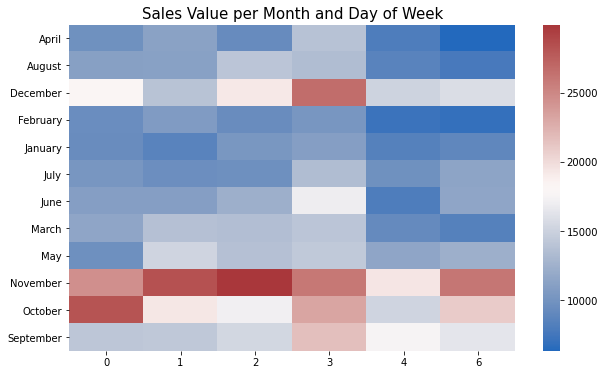

In [ ]:
HM_Data = data.pivot_table(index = 'MonthName',columns = 'DayOfWeek', values = 'UnitPrice', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()

#### 5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no. of customers.

In [ ]:
Top10Customers = data.groupby('CustomerID').agg({"Quantity":"sum"}).sort_values('Quantity', ascending=False).iloc[:10]
print(Top10Customers)

            Quantity
CustomerID          
14646.0       177253
14911.0        75797
12415.0        72540
17511.0        61880
18102.0        58185
13694.0        56404
14298.0        54677
17450.0        54049
14156.0        52024
16684.0        47361


In [ ]:
top10Items = data.StockCode.value_counts(sort=True, ascending=False)[:10]
print(top10Items)

85123A    1912
22423     1629
85099B    1530
47566     1329
84879     1312
20725     1253
22720     1101
23203     1031
20727     1027
22383     1009
Name: StockCode, dtype: int64


## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
def feature_engineering(df):
    # total spend by each customer
    df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
    # unique customers
    data_grouped = df.groupby('CustomerID')[['Quantity','TotalSpend']].agg('sum').reset_index()
    # maximum visits on day of week by each customer 
    data_grouped['DayOfWeek'] = df.groupby('CustomerID')['DayOfWeek'].agg('max').reset_index()['DayOfWeek']
    return data_grouped

In [ ]:
data_grouped = feature_engineering(data)

### Scale the data
 
Apply `StandardScaler` on the features.

In [ ]:
# Select the features
X = data_grouped.iloc[:, 1:]

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape, X.min(), X.max()

((4316, 4), -1.9460715593883944, 41.1486005867241)

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
# Fitting k-means to the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

In [ ]:
# Using the Elbow method to find the optimal no.of clusters
inertia = []
clusters, centroids = {}, {}

for i in range(2,15): 
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    clusters[i] = kmeans.fit_predict(X)
    centroids[i] = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

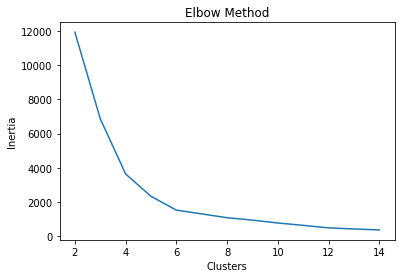

In [ ]:
# plot the clusters vs inertia
plt.plot(range(2,15) , inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Optimal cluster at 6, so choosing centroids 
centroids_optimal = centroids[6]
clusters_optimal = clusters[6]

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
# Perform DBSCAN on data
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.24, min_samples=7)
dbscan.fit(X)
db_labels = dbscan.labels_
print("Unique clusters in data: ", np.unique(db_labels))

Unique clusters in data:  [-1  0  1  2  3  4  5]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

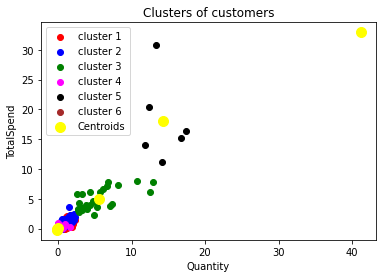

In [ ]:
# Visualising the clusters considering Unit Price and Quantity
plt.scatter(X[clusters_optimal == 0, 0], X[clusters_optimal == 0, 1], c = 'red', label = 'cluster 1')
plt.scatter(X[clusters_optimal == 1, 0], X[clusters_optimal == 1, 1], c = 'blue', label = 'cluster 2')
plt.scatter(X[clusters_optimal == 2, 0], X[clusters_optimal == 2, 1], c = 'green', label = 'cluster 3')
plt.scatter(X[clusters_optimal == 3, 0], X[clusters_optimal == 3, 1], c = 'magenta', label = 'cluster 4')
plt.scatter(X[clusters_optimal == 4, 0], X[clusters_optimal == 4, 1], c = 'k', label = 'cluster 5')
plt.scatter(X[clusters_optimal == 5, 0], X[clusters_optimal == 5, 1], c = 'brown', label = 'cluster 6')
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Quantity')
plt.ylabel('TotalSpend')
plt.legend()
plt.show()

From the above plot, we can see the clusters are separable in 2D plot using scaled features

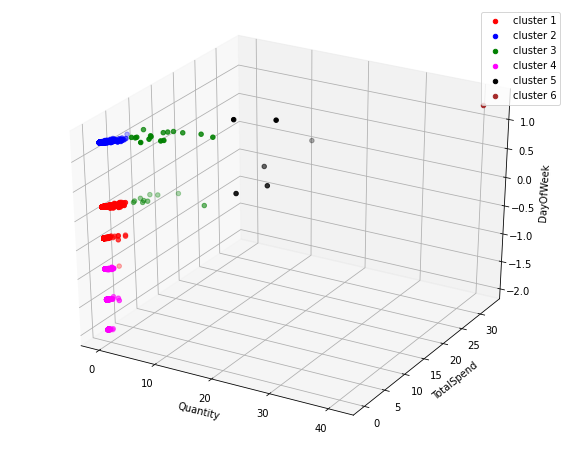

In [ ]:
# Visualising all the clusters in 3D

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X[clusters_optimal == 0, 0], X[clusters_optimal == 0, 1], X[clusters_optimal == 0, 2], c = 'red', label = 'cluster 1')
ax.scatter(X[clusters_optimal == 1, 0], X[clusters_optimal == 1, 1], X[clusters_optimal == 1, 2], c = 'blue', label = 'cluster 2')
ax.scatter(X[clusters_optimal == 2, 0], X[clusters_optimal == 2, 1], X[clusters_optimal == 2, 2], c = 'green', label = 'cluster 3')
ax.scatter(X[clusters_optimal == 3, 0], X[clusters_optimal == 3, 1], X[clusters_optimal == 3, 2], c = 'magenta', label = 'cluster 4')
ax.scatter(X[clusters_optimal == 4, 0], X[clusters_optimal == 4, 1], X[clusters_optimal == 4, 2], c = 'k', label = 'cluster 5')
ax.scatter(X[clusters_optimal == 5, 0], X[clusters_optimal == 5, 1], X[clusters_optimal == 5, 2], c = 'brown', label = 'cluster 6')
ax.set_xlabel("Quantity")
ax.set_ylabel("TotalSpend")
ax.set_zlabel("DayOfWeek")
ax.legend()
plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data
* Use this model to predict the labels for the Test data (note: Test data is provided separately below)

In [ ]:
data_grouped['Label'] = clusters[6]
data_grouped.head(3)

,CustomerID,Quantity,TotalSpend,DayOfWeek,Label
0,12347.0,2352,4091.80,3,0
1,12348.0,2188,1395.48,6,1
2,12349.0,605,1241.26,0,3


In [ ]:
features = data_grouped.iloc[:,1:-1]
labels = data_grouped.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3237, 3), (1079, 3), (3237,), (1079,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.9990732159406858

### Evaluation of Test Data

* Format the test data in the same format as the train data.
* predict it with trained supervised ML model

In [ ]:
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [ ]:
test_preprocessed = pre_processing(test)
df_test = feature_engineering(test_preprocessed)
df_test.head(2)

In [ ]:
df_test.isna().sum()

CustomerID    0
Quantity      0
TotalSpend    0
DayOfWeek     0
dtype: int64

In [ ]:
test_features = df_test.iloc[:,1:]
rf.predict(test_features)

array([0, 3, 3, ..., 0, 0, 1], dtype=int32)

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values 
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What others methods could be used to determine the optimal no. of clusters?